### Домашняя работа 1 
Зенина Алёна БКЛ-201
#### Вариант 2
Связная компонента в 1 домашнем задании у меня была всего одна, поэтому беру всё, что было

In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import wordnet as wn
import networkx as nx
from sklearn import manifold
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt 
from operator import itemgetter

In [3]:
search_exemplar = wn.synset('throw.v.01')
search_exemplar

Synset('throw.v.01')

In [4]:
lemmas = {}
counter = 0
heads = []
for lang in wn.langs():
    lemmas[lang] = search_exemplar.lemma_names(lang=lang)
    counter += len(lemmas[lang])
    for lemma in lemmas[lang]:
        heads.append(lemma)
print(heads, "\n", len(heads))

['throw', 'hedhje', 'أقام_حفلة', 'إلقاء', 'ألقى', 'بنى_سدا', 'خسر_المباراة_متعمدا', 'رجم', 'رمى', 'سجن', 'طرح', 'طرح_سؤلا', 'غزل', 'فك_التعشيق', 'قذف', 'نظم_حفلة', 'نفث_دخانا', 'هجر', 'метна', 'мятам', 'хвърля', 'хвърлям', 'llançar', '扔', '投', '投掷', '抛', '掷', 'kaste', 'εκτοξεύω', 'ρίπτω', 'bulkatu', 'bultzatu', 'egotzi', 'eragin', 'jaurti', 'jaurtiki', 'sakatu', 'lennättää', 'jeter', 'bacati', 'baciti', 'hitati', 'hititi', 'izbaciti', 'izbacivati', 'melancarkan', 'melanting', 'melantingkan', 'melejang', 'melempar', 'melemparkan', 'melontar', 'melontari', 'melontarkan', 'membuang', 'mencampak', 'mencampakkan', 'mencapak', 'mengeban', 'mengempaskan', 'menghembalangkan', 'buttare', 'gettare', 'lanciare', 'ほうる', '投げる', '投擲+する', '抛る', '放る', '放り投げる', 'flikkeren', 'gooien', 'jenzen', 'kegelen', 'keilen', 'kieperen', 'knikkeren', 'kogelen', 'kukelen', 'kwakken', 'lazeren', 'mikken', 'plompen', 'werpen', 'zwiepen', 'kaste', 'kaste', 'atirar', 'lançar', '扔', '拽', 'vreči', 'zabrisati', 'zagnati',

Создаю словарь, где для каждого слова сохраняется его язык

In [5]:
langs = {}
for lang in wn.langs():
    for word in lemmas[lang]:
        langs[word] = lang

Отбираю валидные синсеты (как в первой домашке, у которых больше 3 слов)

In [6]:
synsets = [] 
for lang in wn.langs():
    for lemma in lemmas[lang]:
        for syn in wn.synsets(lemma, lang=lang):
            synsets.append(syn)

In [7]:
count_synsets = list(x for x in set(synsets) if synsets.count(x) > 3)
count_names = list(x.name() for x in set(synsets) if synsets.count(x) > 3)
count_names

['eject.v.01',
 'lunge.v.01',
 'throw.v.14',
 'confuse.v.02',
 'throw.v.13',
 'crash.v.10',
 'trash.v.01',
 'hurl.v.03',
 'throw.v.01',
 'shoot.v.08',
 'project.v.10',
 'thrust.v.01',
 'toss.v.06',
 'roll.v.12',
 'chuck.v.01',
 'throw.v.04',
 'discard.v.01',
 'convulse.v.03',
 'slam.v.04',
 'give.v.07',
 'expel.v.01',
 'project.v.11',
 'shed.v.01',
 'discontinue.v.01',
 'throw.v.06',
 'exhaust.v.05',
 'dump.v.01',
 'fling.v.01',
 'dismiss.v.01',
 'heave.v.02',
 'throw.v.02',
 'bewilder.v.02',
 'hold.v.03',
 'propel.v.01',
 'flip.v.01',
 'flip.v.05',
 'cast.v.02',
 'launch.v.02',
 'fling.v.02',
 'sling.v.01',
 'chuck.v.02',
 'cast.v.07',
 'hurl.v.01',
 'loft.v.02',
 'flip.v.06']

Создание матрицы

In [8]:
matrix = []
for row in count_synsets:
    x = []
    for column in heads:
        if row in wn.synsets(column, lang=langs[column]):
            x.append(1)
        else:
            x.append(0)
    matrix.append(x)
new_matrix = pd.DataFrame(matrix, columns=heads, index=count_names) 
new_matrix

,throw,hedhje,أقام_حفلة,إلقاء,ألقى,بنى_سدا,خسر_المباراة_متعمدا,رجم,رمى,سجن,...,melemparkan,melontar,melontari,melontarkan,membaling,membuang,mencampak,mencampakkan,mencapak,menghembalangkan
eject.v.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lunge.v.01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
throw.v.14,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
confuse.v.02,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,1,0
throw.v.13,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,0,0
crash.v.10,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
trash.v.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
hurl.v.03,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
throw.v.01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
shoot.v.08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Сокращение с MDS и визуализация

In [9]:
array = new_matrix.values
similarities = euclidean_distances(array)
mds = manifold.MDS(n_components=2)
print(mds.fit(similarities).stress_)

C:\Users\listv\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


2804.869139685934


In [10]:
array_mds = mds.fit_transform(array)
print (array_mds)

[[ 3.43469092  1.22802476]
 [-1.09393638  1.63350081]
 [-1.54113498  0.2855239 ]
 [-0.70238226 -2.56837123]
 [-2.35538792 -0.2906842 ]
 [ 2.86818245 -1.43039557]
 [-0.25539441 -0.11475663]
 [-0.07803075 -3.64284621]
 [-9.61951763 -0.07937965]
 [ 1.26629605  2.60352475]
 [-2.01780051 -2.68788384]
 [ 2.16698073  2.0509805 ]
 [ 0.67548218 -1.07802181]
 [ 2.06850474  0.65033803]
 [-3.32913464  1.14069248]
 [-1.62399991 -2.55235604]
 [-4.19790856 -0.68121029]
 [ 0.94462911 -1.38248645]
 [ 1.74846829 -0.20677689]
 [-1.5826315  -3.03249978]
 [ 3.13180403  0.5917147 ]
 [-0.65845058  1.85390036]
 [-3.3614302  -4.43603545]
 [ 1.53368128  1.78404676]
 [-2.19452603 -2.10258506]
 [ 2.10540181  0.30643771]
 [ 3.45761924  0.1016353 ]
 [-4.67578362  2.8006989 ]
 [ 2.34054526 -0.61730708]
 [ 1.66447415  2.89270553]
 [-1.02072296 -0.5998168 ]
 [-0.13881558 -2.80045648]
 [-0.07917888 -2.58337477]
 [ 2.47201282  1.63390875]
 [-1.01798187  3.17072522]
 [ 1.18672119  2.99608365]
 [ 1.00254633  0.44850039]
 

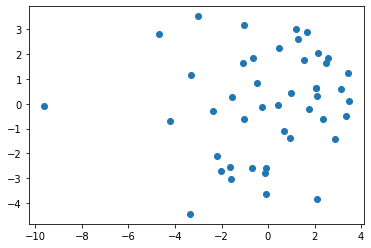

In [11]:
plt.scatter(array_mds[:, 0], array_mds[:, 1])
plt.show()

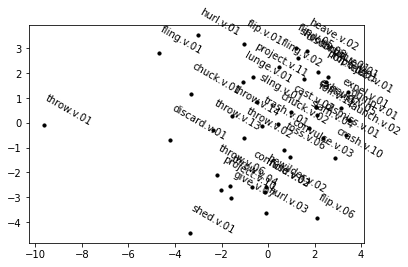

In [12]:
x = []
y = []
for pair in array_mds:
    x.append(pair[0])
    y.append(pair[1])
phrases = count_names
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(phrases[i], (x[i], y[i]), rotation=-30)
plt.show()

У меня по какой-то причине не получилось увеличить размер графика, поэтому я построила сразу два, чтобы было чуть понагляднее. О результатах: с помощью этого графика видно, что базовый синсет сильно выделяется среди остальных (на графе в первой домашке такого не было), но это вполне объяснимо тем, что у него наибольшее количество единиц в векторе. Как и в первой домашке сложно сказать о том, на какие кластеры разбивается данное поле, поскольку оно очень плотное, и видно, что большая часть сиснсетов находится очень близко друг к другу, и лишь небольшая часть "окружает" основную массу. Данный результат мне особо осмысленным не кажется, нужно сделать алгоритм отбора синсетов более подходящим для такого плотного поля.

In [13]:
def get_lemmas(synx):
    lemmas = []
    for lang in wn.langs():
            for  lemma in synx.lemma_names(lang=lang):
                lemmas.append(lemma)
    return lemmas

In [14]:
def comp(x, y):
    res = 0
    for i in x:
        for j in y:
            if i == j:
                res += 1
    return res

In [15]:
edges = []
done = []
for syn1 in count_synsets:
    lemmas1 = get_lemmas(syn1)
    for syn2 in count_synsets:
        if syn1 != syn2 and syn2 not in done:
            lemmas2 = get_lemmas(syn2)
            weight = comp(lemmas1, lemmas2)
            if weight >= 10:
                edges.append([syn1.name(), syn2.name(), weight])
    done.append(syn1)
sorted_edges = sorted(edges, key=itemgetter(2), reverse=True)
sorted_edges

[['throw.v.01', 'fling.v.01', 69],
 ['project.v.10', 'shed.v.01', 69],
 ['discard.v.01', 'shed.v.01', 65],
 ['throw.v.01', 'shed.v.01', 62],
 ['give.v.07', 'hold.v.03', 59],
 ['fling.v.01', 'hurl.v.01', 56],
 ['throw.v.04', 'shed.v.01', 50],
 ['confuse.v.02', 'bewilder.v.02', 48],
 ['throw.v.01', 'discard.v.01', 47],
 ['throw.v.01', 'hurl.v.01', 47],
 ['project.v.10', 'give.v.07', 47],
 ['project.v.10', 'throw.v.04', 46],
 ['throw.v.01', 'chuck.v.01', 45],
 ['throw.v.01', 'give.v.07', 45],
 ['throw.v.04', 'give.v.07', 45],
 ['give.v.07', 'shed.v.01', 45],
 ['project.v.10', 'throw.v.06', 44],
 ['throw.v.04', 'throw.v.06', 44],
 ['give.v.07', 'throw.v.06', 44],
 ['shed.v.01', 'throw.v.06', 44],
 ['throw.v.01', 'project.v.10', 43],
 ['chuck.v.01', 'fling.v.01', 43],
 ['throw.v.13', 'shed.v.01', 42],
 ['throw.v.01', 'throw.v.06', 42],
 ['throw.v.01', 'flip.v.06', 42],
 ['throw.v.01', 'throw.v.04', 41],
 ['discard.v.01', 'fling.v.01', 40],
 ['hurl.v.03', 'throw.v.01', 39],
 ['hurl.v.03', 's

Граф получился не очень((, видимо, я не очень поняла описанный алгоритм, но он разбился на две компоненты, чего раньше не было, причем у это маленькой компоненты достаточно схожие значения внутри, большая компонента все равно получилась очень путанной. Лучше графа из первой домашки, но всё равно каких-то данных из него извлечь сложно

In [16]:
THROW2 = nx.Graph()
for edge in sorted_edges:
    THROW2.add_edge(edge[0], edge[1], weight=edge[2])
    if nx.is_connected(THROW2):
        THROW2.remove_edge(edge[0], edge[1])

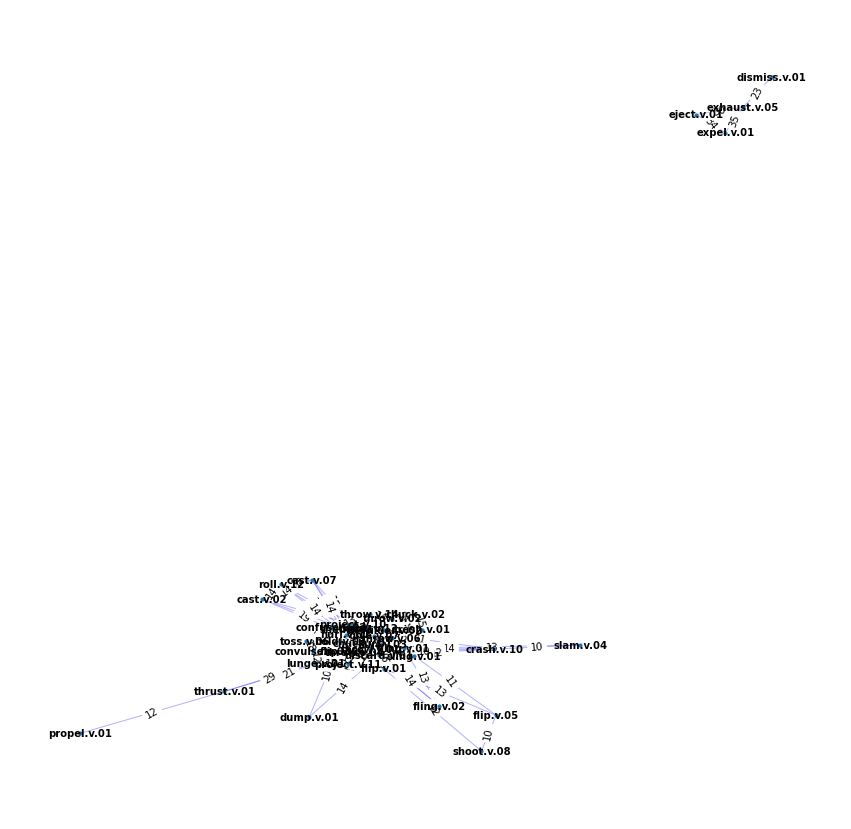

In [17]:
pos=nx.spring_layout(THROW2)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(THROW2, pos, node_size=10) 
labels = nx.get_edge_attributes(THROW2,'weight')
nx.draw_networkx_edge_labels(THROW2, pos, edge_labels=labels)
nx.draw_networkx_edges(THROW2, pos, alpha=0.3, edge_color='blue')
nx.draw_networkx_labels(THROW2, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()